# Option 1: Augmenter le nombre de paramètre 
$$ y(x) = 2x + \cos(25x)\\ X \sim Uniform[-1,1] \\
\hat{y} = \sum_{i=1}^p \beta_i \phi_i(x) \quad \text{où} \quad \{\phi_i\}_{i=1}^n$$

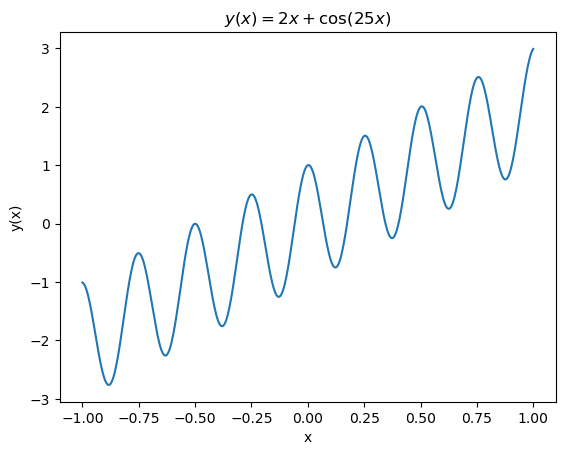

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 500)
y = 2 * x + np.cos(25 * x)

plt.plot(x, y)
plt.title(r"$y(x) = 2x + \cos(25x)$")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.show()

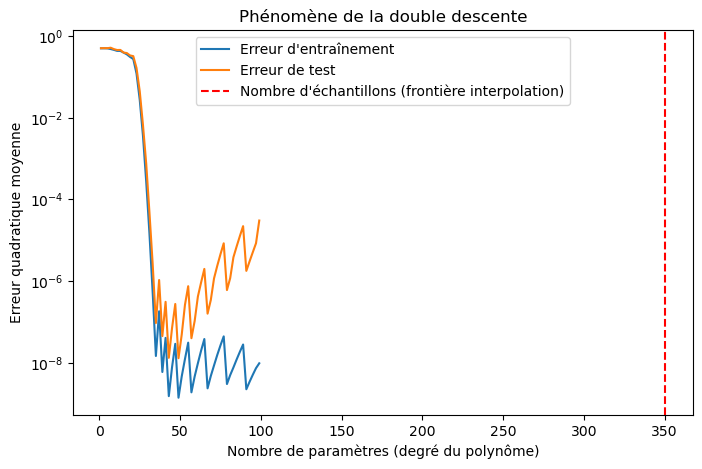

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Phénomène de la double descente : on ajuste un modèle polynomial de degré p à (x, y)
# et on trace l'erreur en fonction du nombre de paramètres (degré du polynôme)


degrees = np.arange(1, 100, 2)
train_errors = []
test_errors = []

# Séparation train/test
np.random.seed(42)
indices = np.random.permutation(len(x))
split = int(0.7 * len(x))
train_idx, test_idx = indices[:split], indices[split:]
x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    X_test_poly = poly.transform(x_test.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(8,5))
plt.plot(degrees, train_errors, label="Erreur d'entraînement")
plt.plot(degrees, test_errors, label="Erreur de test")
plt.axvline(split, color='r', linestyle='--', label="Nombre d'échantillons (frontière interpolation)")
plt.yscale('log')
plt.xlabel("Nombre de paramètres (degré du polynôme)")
plt.ylabel("Erreur quadratique moyenne")
plt.title("Phénomène de la double descente")
plt.legend()
plt.show()

# Option 2: Augmenter la taille du jeu de données
$$ X \in \mathbb{R}^{n\times p}$$
Le cas sous-paramétré $(n > p)$
$$\hat{\beta}= (X^\top X)^{-1}X^\top y \quad \text{où} \quad X^\top X \in \mathbb{R}^{p \times p}$$
Le cas sur-paramétré $(n < p)$ rang(X) < p
$$\hat{\beta}= \text{arg min}_\beta \frac{1}{2} \left\lVert \beta \right\rVert^2, \quad \text{t.q} \quad X\beta = y$$
Il faut analyse le Lagrangien du problème
$$
y(\beta, \lambda) = \frac{1}{2} \left\lVert \beta \right\rVert^2 + \lambda^\top (X\beta - y) = \frac{1}{2} \beta^\top \beta + \lambda^\top X \beta - \lambda^\top y
$$

On trouve après dérivation du gradient
$$ \hat{\beta} = X^\top (X^\top X)^{-1} y $$
L'erreur du modèle
$$
\text{erreur de test} = X_{\text{test}} \hat{\beta} - X_{\text{test}} \beta
$$
$$ 
\text{sous-paramétré} = X_{\text{test}} ( (X^\top X)^{-1} (X\beta + \epsilon) - \beta) = X_{\text{test}} (X^\top X)^{-1}X^\top\epsilon
$$

$$
\begin{align*}
X  = U \Sigma V^\top &= X_{\text{test}}(U\Sigma U^\top U\Sigma V^\top)^{-1}V \Sigma U^\top \epsilon \\
&= X_{\text{test}} ( V \Sigma^2 V ^\top)^{-1} V \Sigma U^\top \epsilon \\
&= X_{\text{test}} V \Sigma^{-2} V^\top V \Sigma U^\top \epsilon \\
&=  X_{\text{test}} V \Sigma^{-2} \Sigma U^\top \epsilon \\
&= X_{\text{test}} V \Sigma^{-1} U^\top \epsilon 
\end{align*}
$$

$$ 
\begin{align*}
\text{sur-paramétré}&= X_{\text{test}} ( X^\top (X^\top X)^{-1} (X\beta + \epsilon) - \beta) \\
&= X_{\text{test}} ( X^\top (X^\top X)^{-1} (X\beta + \epsilon) - \mathbb{I}) \beta + X_{\text{test}}  X^\top (X^\top X)^{-1} \epsilon  \quad \text{Avec } X= U\Sigma V ^\top
\end{align*}
$$
La première partie est le bias et on calcule le second
$$ 
\begin{align*}
X_{\text{test}}  X^\top (X^\top X)^{-1} \epsilon &= X_{\text{test}}  V\Sigma U ^\top (U\Sigma V ^\top V\Sigma U ^\top)^{-1}\epsilon \\
&= X_{\text{test}}  V\Sigma U ^\top (U\Sigma^2 U ^\top)^{-1}\epsilon \\
&= X_{\text{test}}  V\Sigma U ^\top U\Sigma^{-2} U ^\top\epsilon \\
&= X_{\text{test}}  V\Sigma^{-1} U ^\top\epsilon
\end{align*}
$$